# Hector Adapter

In [1]:
# Import Packages
import logging
import os.path
import csv

from configparser import ConfigParser
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scmdata
import warnings

import openscm_runner
from openscm_runner.run import run
from openscm_runner.adapters import HECTOR
from openscm_runner.adapters import CICEROSCM
from openscm_runner.utils import calculate_quantiles

/var/folders/03/82f8dprj20zdn3zkgcd_p1280000gn/T/ipykernel_13289/2041218104.py:9: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/Users/prim232/gitrepos/my-openscm-runner/my-openscm-env/lib/python3.9/site-packages/scmdata/database/_database.py:9: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  import tqdm.autonotebook as tqdman
/Users/prim232/gitrepos/my-openscm-runner/my-openscm-env/lib/python3.9/site-packages/pymagicc/io/base.py:224: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated

<IPython.core.display.Javascript object>

/Users/prim232/gitrepos/my-openscm-runner/my-openscm-env/lib/python3.9/site-packages/pymagicc/io/base.py:224: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
/Users/prim232/gitrepos/my-openscm-runner/my-openscm-env/lib/python3.9/site-packages/pymagicc/io/base.py:224: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
/Users/prim232/gitrepos/my-openscm-runner/my-openscm-env/lib/python3.9/site-packages/pymagicc/io/base.py:224: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
/Users/prim232/gitrepos/my-openscm-runner/my-openscm-env/lib/python3.9/site-packages/pymagicc/io/base.py:224: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated

In [2]:
# Read in Future input emissions
input_emissions = scmdata.ScmRun(
    os.path.join(
        "..", "tests", "test-data", "rcmip_scen_ssp_world_emissions.csv"
    ),
    lowercase_cols=True,
)

input_emissions.head(30)

time                                                                                                    2015-01-01  \
model   region scenario                  unit             variable                                                   
AIM/CGE World  ssp370                    Mt BC/yr         Emissions|BC                                    9.727424   
                                         kt C2F6/yr       Emissions|C2F6                                  1.570000   
                                         kt C6F14/yr      Emissions|C6F14                                 0.350000   
                                         kt CF4/yr        Emissions|CF4                                  10.869900   
                                         Mt CH4/yr        Emissions|CH4                                 388.072796   
                                         Mt CO/yr         Emissions|CO                                  934.349885   
                                         Mt CO2/yr        Emissions|CO2|MAGICC AFOLU                   3517.440000   
                                                          Emissions|CO2|MAGICC Fossil and Industrial  35635.286298   
                                         kt HFC125/yr     Emissions|HFC125                               78.790600   
                                         kt HFC134a/yr    Emissions|HFC134a                             201.953400   
                                         kt HFC143a/yr    Emissions|HFC143a                              32.381000   
                                         kt HFC227ea/yr   Emissions|HFC227ea                              3.663300   
                                         kt HFC23/yr      Emissions|HFC23                                14.485700   
                                         kt HFC245fa/yr   Emissions|HFC245fa                             11.728500   
                                         kt HFC32/yr      Emissions|HFC32                                38.579200   
                                         kt HFC4310mee/yr Emissions|HFC4310mee                            1.151600   
                                         kt N2O/yr        Emissions|N2O                               10900.000000   
                                         Mt NH3/yr        Emissions|NH3                                  65.279703   
                                         Mt NOx/yr        Emissions|NOx                                 155.520450   
                                         Mt OC/yr         Emissions|OC                                   34.746024   
                                         kt SF6/yr        Emissions|SF6                                   8.020000   
                                         Mt SO2/yr        Emissions|Sulfur                              100.771167   
                                         Mt VOC/yr        Emissions|VOC                                 227.244819   
               ssp370-lowNTCF-aerchemmip Mt BC/yr         Emissions|BC                                    9.727424   
                                         kt C2F6/yr       Emissions|C2F6                                  1.570000   
                                         kt C6F14/yr      Emissions|C6F14                                 0.350000   
                                         kt CF4/yr        Emissions|CF4                                  10.869900   
                                         Mt CH4/yr        Emissions|CH4                                 388.072796   
                                         Mt CO/yr         Emissions|CO                                  934.349885   
                                         Mt CO2/yr        Emissions|CO2|MAGICC AFOLU                   3517.440000   

time                                                                                                    2020-01-01  \
model   region scenario                  unit             variable                                       

In [3]:
# Set Hector configs
hector_cfgs = [
    {},
    {
        'beta': 0.60,
        'S': 3.5,
        'diff': 1.2
    },
    {
        'beta': 0.40,
        'S': 3.2,
        'diff': 1.8
    }
]

In [4]:
# Output Variables
output_variables=[
    "Surface Air Temperature Change",
    "Atmospheric Concentrations|CO2",
    "Effective Radiative Forcing|Greenhouse Gases",
    'Effective Radiative Forcing|Aerosols',
    'Effective Radiative Forcing|Anthropogenic',
    'Heat Uptake|Ocean',
    'Heat Uptake'
]

In [5]:
hector = HECTOR()

In [6]:
hector_runs = hector._run(input_emissions, hector_cfgs, output_variables, None)

Thu Apr 11 13:44:02 2024:NOTICE:printLogHeader: hector version 3.1.1
Thu Apr 11 13:44:02 2024:NOTICE:main: hector wrapper start
Thu Apr 11 13:44:02 2024:NOTICE:main: Reading input file /Users/prim232/gitrepos/my-openscm-runner/src/openscm_runner/adapters/hector_adapter/input/run_dir/IMAGE_World_ssp119_cfg.ini
Thu Apr 11 13:44:02 2024:NOTICE:main: Creating and initializing the core.
Thu Apr 11 13:44:02 2024:DEBUG:registerCapability: trackingDate registered to component core
Thu Apr 11 13:44:02 2024:DEBUG:registerCapability: RF_C2F6 registered to component C2F6_halocarbon
Thu Apr 11 13:44:02 2024:DEBUG:registerCapability: C2F6_concentration registered to component C2F6_halocarbon
Thu Apr 11 13:44:02 2024:DEBUG:registerCapability: C2F6_constrain registered to component C2F6_halocarbon
Thu Apr 11 13:44:02 2024:DEBUG:registerCapability: rho_C2F6 registered to component C2F6_halocarbon
Thu Apr 11 13:44:02 2024:DEBUG:registerCapability: delta_C2F6 registered to component C2F6_halocarbon
Thu A

# Plots

In [7]:
plot_kwargs = dict(
    quantiles_plumes=[((0.05, 0.95), 0.5), ((0.5,), 1.0)],
    quantile_over="run_id",
    hue_var="scenario",
    style_var="model",
    style_label="IAM",
    time_axis="year"
)

In [10]:
hector_runs.meta.variable.unique()

array(['Surface Air Temperature Change', 'Atmospheric Concentrations|CO2',
       'Effective Radiative Forcing|Greenhouse Gases',
       'Effective Radiative Forcing|Aerosols',
       'Effective Radiative Forcing|Anthropogenic', 'Heat Uptake|Ocean'],
      dtype=object)

Text(0.5, 1.0, 'Hector OpenSCM Adapter Results (Effective Radiative Forcing|Anthropogenic)')

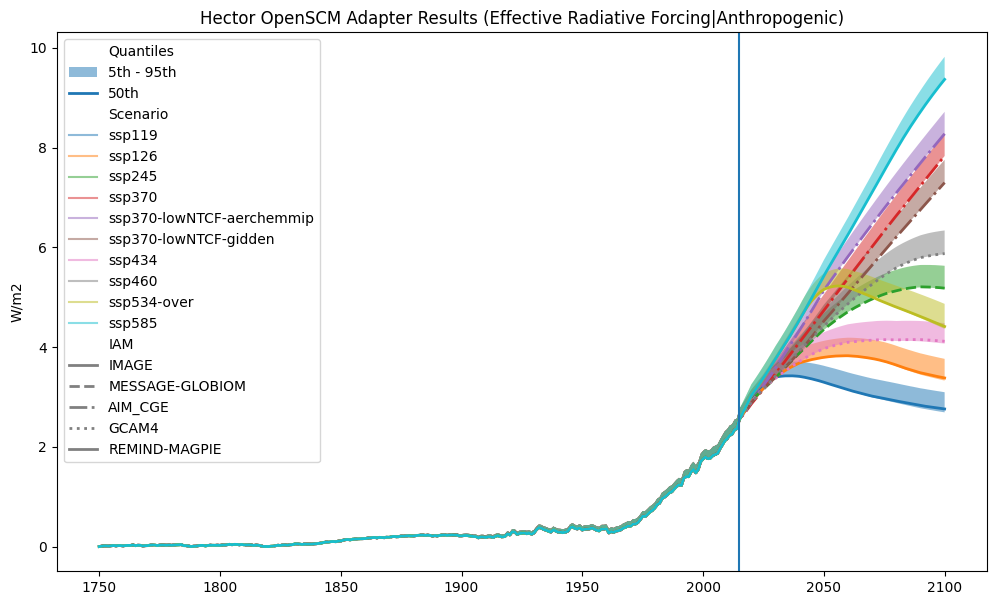

In [11]:
%%capture --no-display
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
hector_runs.filter(variable="Effective Radiative Forcing|Anthropogenic").plumeplot(
    ax=ax, **plot_kwargs
)
ax.axvline(2015)
plt.title('Hector OpenSCM Adapter Results (Effective Radiative Forcing|Anthropogenic)')

Text(0.5, 1.0, 'Hector OpenSCM Adapter Results (Surface Air Temperature Change)')

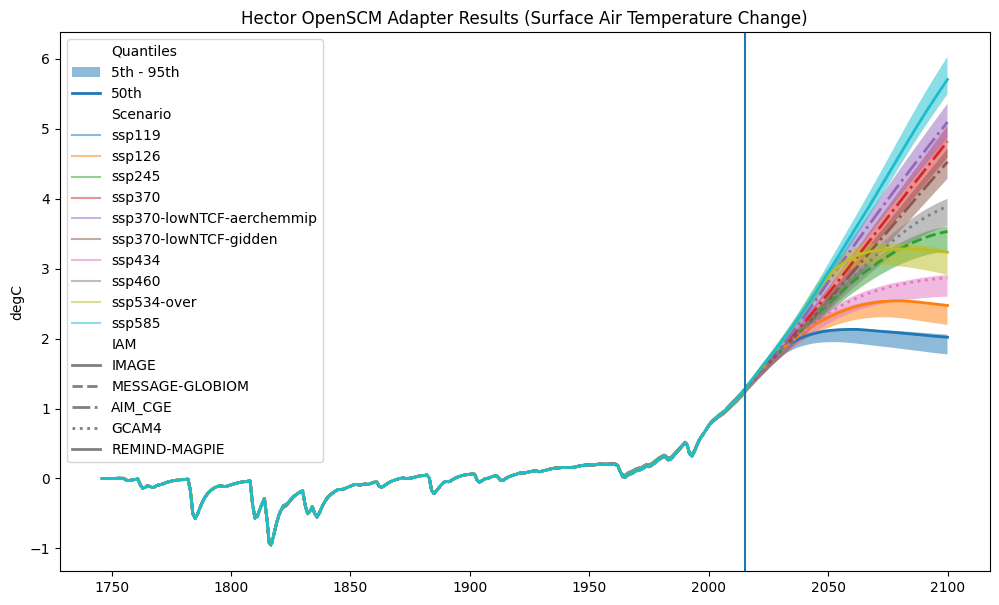

In [12]:
%%capture --no-display
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
hector_runs.filter(variable="Surface Air Temperature Change").plumeplot(
    ax=ax, **plot_kwargs
)
ax.axvline(2015)
plt.title('Hector OpenSCM Adapter Results (Surface Air Temperature Change)')

# Stats

In [14]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    # tas change ssp126
    max_tas_change_2100_ssp126 = hector_runs.filter(
        variable="Surface Air Temperature Change", year=2100, scenario=["ssp126"]
    ).values.max()
    min_tas_change_2100_ssp126 = hector_runs.filter(
        variable="Surface Air Temperature Change", year=2100, scenario=["ssp126"]
    ).values.min()
    # 5th and 95th quantile tas change ssp126
    quantiles = calculate_quantiles(hector_runs, [0.05, 0.17, 0.5, 0.83, 0.95])
    q05_tas_change_2100_ssp126 = quantiles.filter(
        variable="Surface Air Temperature Change",
        year=2100,
        scenario=["ssp126"],
        quantile=0.05,
    ).values[0][0]
    q95_tas_change_2100_ssp126 = quantiles.filter(
        variable="Surface Air Temperature Change",
        year=2100,
        scenario=["ssp126"],
        quantile=0.95,
    ).values[0][0]
    print(f'tas change was between {min_tas_change_2100_ssp126:.2f} and {max_tas_change_2100_ssp126:.2f} by the ' +
    f'year 2100 for ssp126, with the 5th quantile {q05_tas_change_2100_ssp126:.2f} and 95th quantile {q95_tas_change_2100_ssp126:.2f}')

    # tas change ssp370
    max_tas_change_2100_ssp370 = hector_runs.filter(
        variable="Surface Air Temperature Change", year=2100, scenario=["ssp370"]
    ).values.max()
    min_tas_change_2100_ssp370 = hector_runs.filter(
        variable="Surface Air Temperature Change", year=2100, scenario=["ssp370"]
    ).values.min()
    # 5th and 95th quantile tas change ssp370
    quantiles = calculate_quantiles(hector_runs, [0.05, 0.17, 0.5, 0.83, 0.95])
    q05_tas_change_2100_ssp370 = quantiles.filter(
        variable="Surface Air Temperature Change",
        year=2100,
        scenario=["ssp370"],
        quantile=0.05,
    ).values[0][0]
    q95_tas_change_2100_ssp370 = quantiles.filter(
        variable="Surface Air Temperature Change",
        year=2100,
        scenario=["ssp370"],
        quantile=0.95,
    ).values[0][0]
    print(f'tas change was between {min_tas_change_2100_ssp370:.2f} and {max_tas_change_2100_ssp370:.2f} by the ' +
    f'year 2100 for ssp370, with the 5th quantile {q05_tas_change_2100_ssp370:.2f} and 95th quantile {q95_tas_change_2100_ssp370:.2f}')

tas change was between 2.16 and 2.49 by the year 2100 for ssp126, with the 5th quantile 2.20 and 95th quantile 2.49
tas change was between 4.56 and 5.07 by the year 2100 for ssp370, with the 5th quantile 4.59 and 95th quantile 5.05
